# Brian S Caffo
<hr>
Professor<br>
Departments of Biostatistics (primary)<br>
Department of Biomedical Engineering (courtesy)<br>
Johns Hopkins University<br>
[Contact information](https://publichealth.jhu.edu/departments/biostatistics) <br>
He/Him/His <br>
[www.bcaffo.com](www.bcaffo.com) <br>
CV suggestions/PRs welcome [github, https://github.com/bcaffo/cv](https://github.com/bcaffo/cv) <br>
Note that the version is better than a print version, since the graphs are interactive and I have to use a screen recorder to get all of the javascript to render in print well [Live version, https://bcaffo.github.io/cv/cvJupyter.html](https://bcaffo.github.io/cv/cvJupyter.html) 

# Part I 
## Summary
Brian Caffo, PhD is a professor in the Department of Biostatistics with a secondary appointment in the Department of Biomedical Engineering at Johns Hopkins University. 
He graduated from the University of Florida Department of Statistics in 2001. He has worked in statistical computing, statistical modeling, computational statistics, multivariate and decomposition methods and statistics in neuroimaging and neuroscience. He led teams that won the ADHD 200 prediction competition. He co-directs the SMART statistical group. With other faculty at JHU, he created and co-directs the Coursera Data Science Specialization, a 10 course specialization on statistical data analysis. He co-directs the JHU Data Science Lab, a group dedicated to open educational innovation and data science. He is the former director of the Biostatistics graduate programs and admissions committees. He is currently the co-director of the Johns Hopkins High Performance Computing Exchange super computing service center and past-president of the Bloomberg School of Public Health faculty senate.

## Education and training

| Year | Description | Institution | | 
|:---  |:---         | :--- | :--- | 
| 2006 | K25 training grant | NIH | *A mentored training program in imaging science* | 
| 2001 | PhD in statistics | U of Florida | *Candidate sampling schemes and some important applications* | 
| 1998 | MS in statistics|  U of Florida | |
| 1995 | Dual BS in mathematics and statistics | U of Florida | |

In [165]:
import pandas as pd
import plotly.express as px
import numpy as np
import wordcloud as wc
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import plotly.graph_objects as go

pd.set_option("display.max_rows", 999)

dat = pd.read_csv("publications_01042022_2.csv")

## Professional experience
Relevant professional experience.

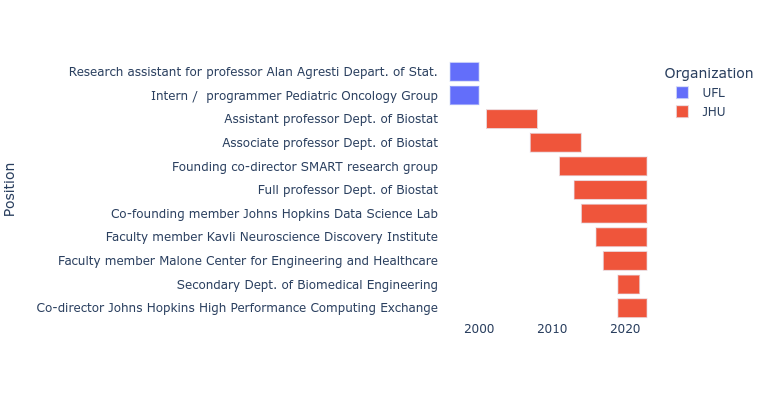

In [289]:
profExp = pd.read_csv("profExp.txt", delimiter="|")
profExp['Start'] = pd.to_datetime("01/01/"+profExp['Start'].astype(str))
profExp['End'] = pd.to_datetime("12/31/"+profExp['End'].astype(str))
profExp = profExp.sort_values(by = ['Start', 'End'])
profExp = profExp.assign(Position=profExp['Title']+" "+profExp['Place'])  
    
    
fig = px.timeline(profExp, x_start="Start", x_end="End", 
                  y='Position', 
                  color="Organization",
                  height=400)

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})


fig.update_yaxes(autorange="reversed")

fig.show()

## Profesional activities

| Year | Activity | 
| :--- | :---     |
| 2005-2006 |Publications Officer for the Biometrics Section of the American Statistical Association |
| 2010 | Founding member Stat in Imaging ASA Section |
| 2010-2011 | Secretary Stat in Imaging ASA Section |

I usually try to create a JSM or ENAR session every year. 

## Editorial activities

| Year | Activity | 
| :--- | :---     |
| 2006-2008 | Associate editor Computational Statistics and Data Analysis |
| 2008-2010 | Associate editor for the Journal of the American Statistical Association |
| 2009-2012 | Associate editor for the Journal of the Royal Statistical Society Series B |
| 2010-2012 | Associate editor for Biometrics
| 2011-2011 | Senior program committee member for the Fourteenth International Conference on Artificial Intelligence and Statistics| 
| 2016-2016 | Guest associate editor for Frontiers in Neuroscience special issues on Brain Imaging Methods
| 2021-2021 | Guest associate editor for Frontiers special issue in Explainable Artificial Intelligence in Healthcare and Finance |

I do NIH, EU, NSF ... ad hoc review panels whenever they ask me and I'm able to. This usually translates to say 3 or so a year. I review manuscripts for journals I like whenever they're relevant to my research expertise and I have done a few conference abstract reviews and chaired sessions for conferences I like.

## Honors and awards

| Year | Award | 
| :--- | :--- |
| 1998 | William S. Mendenhall Award |
| 1999 | Anderson Scholar/Faculty nominee for the University of  Florida CLAS |
| 2001 | University of Florida CLAS Dissertation Fellowship |
| 2001 | University of Florida Statistics Faculty Award |
| 2002 | Johns Hopkins Faculty Innovation Award |
| 2006 | Johns Hopkins Bloomberg School of Public Health AMTRA award |
| 2008 | Johns Hopkins Bloomberg School of Public Health Golden Apple teaching award |
| 2011 | Leader and organizer of the declared winning entry of the 2011 ADHD200 prediction competition |
| 2011 | Presidential Early Career Award for Scientists and Engineers (PECASE, 2010, awarded in 2011); *The highest honor bestowed by the United States government on science and engineering professionals in the early stages of their independent research careers* |
| 2014 | Named a Fellow of the American Statistical Association |
| 2015 | Special Invited Lecturer, European Meeting of Statisticians |

## Publications

Publications reported in Scopus as of 01/04/2021. My total number of Scopus publications is 228. Below is a plot of total publications by year where each little rectangle is a publication. Hovering shows complete citation data.

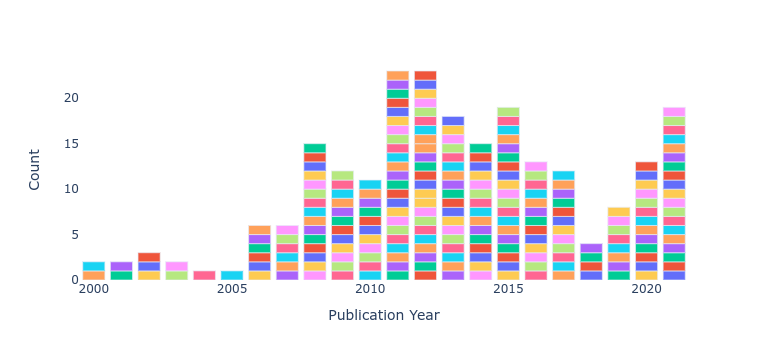

In [303]:
## Create a temporary copy of the dataset and work with that
temp = dat
temp = temp.assign(Count = 1)
temp = temp.rename(columns = {'total' : 'Citations'})

fig = px.bar(temp, x = 'Publication Year', 
                 y = 'Count',
                 color = 'Document Title',
                 hover_data = ['Publication Year', 'Document Title', 'Journal Title', 'Authors', 'Citations'])

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.update_layout(showlegend=False)

## Static image
#Image(fig.to_image(format="png", width=400, height=250, scale=2))

fig.show()


Here are journals I publish in the most. Some of my favorite journals that I have published in less are JRSSA (1), JRSSB (2), JRSSC (1), Biometrika (1), IEEE TMI (1), JCGS (3), AJE (2), Brain (2), Biometrics (4), American Statistician (5), and Neuroimage Clinical (2).

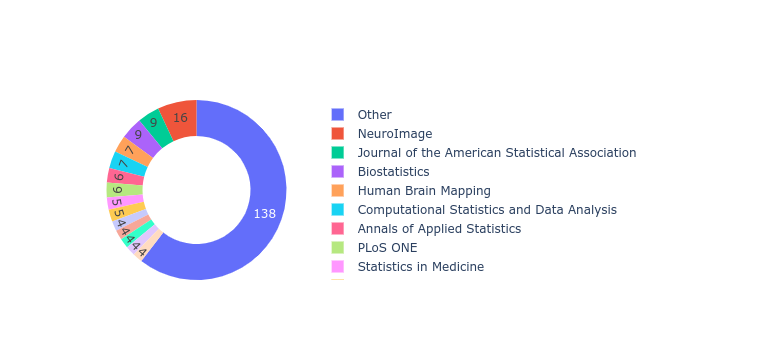

In [194]:
temp = dat['Journal Title'].value_counts().reset_index()
temp = temp.rename(columns = {"index" : "Title", "Journal Title" : "Count"}).sort_values("Count", ascending =False)

temp.loc[temp['Count'] < 4, 'Title']= 'Other'

labels = temp['Title']
values = temp['Count']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.update_traces(textinfo='value')

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})
fig.show()



I have published with 625 coauthors. Here is authors that I have had 10 or over manuscripts with.

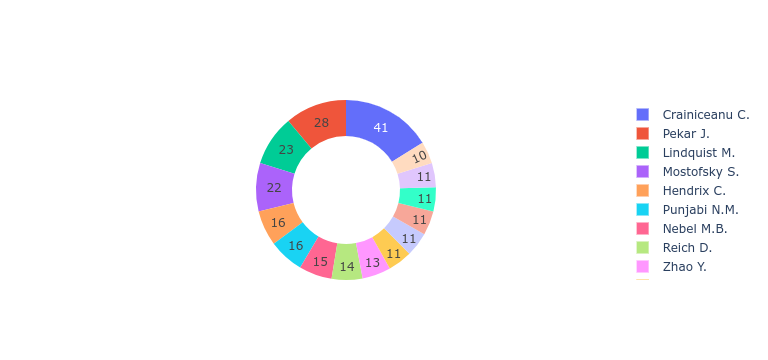

In [193]:
text = [s.split(',') for s in dat['Authors']]
text = [b.lstrip() for a in text for b in a]
#pd.set_option('display.max_rows', None)
authors = pd.DataFrame({'Author' : text}).value_counts().reset_index()#.sort_values("Author")
authors = authors.rename(columns = {0 : 'Count'})
authors = authors.loc[authors['Author'] != 'Caffo B.']
authors.loc[authors['Count'] < 10, 'Author'] = 'Other'
## Decided to get rid of those rows
authors = authors.loc[authors['Author'] != 'Other']

#fig = px.bar(authors, x = "Author", y = "Count")

labels = authors['Author']
values = authors['Count']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.update_traces(textinfo='value')

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.show()



Here's a plot of number of authors for each manuscript.

In [232]:
text = [s.split(',') for s in dat['Authors']]
position = []
authorno = []
for i in range(len(text)):
    s = text[i]
    authorno.append(len(s))
    for j in range(len(s)):
        if 'Caffo B.' in s[j]:
            if (j == 0) :
                position.append('First')
            elif (j == len(s) - 1) :
                position.append('Last')
            elif (j == 1) :
                position.append('Second')
            elif (j == len(s) - 2):
                position.append('Second to last')
            else:
                position.append('Other')


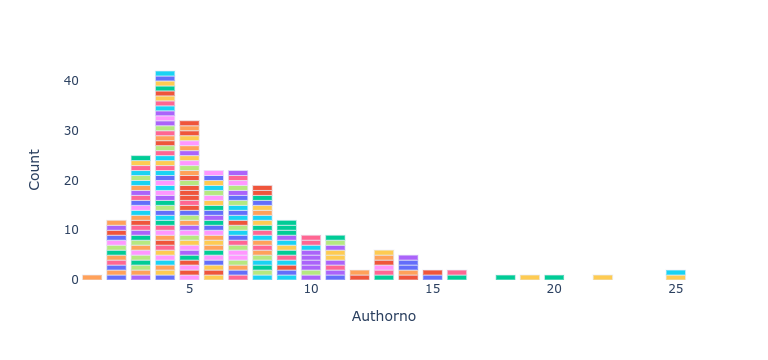

In [299]:
temp = dat
temp = dat.assign(Position = position, Authorno = authorno, Count = 1)

fig = px.bar(temp, x = 'Authorno', 
                 y = 'Count',
                 color = 'Document Title',
                 hover_data = ['Publication Year', 
                               'Document Title', 
                               'Journal Title', 
                               'Authors', 
                                'Position',
                                'Authorno'])
fig.update_layout(showlegend=False)
fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.show()

Here's a plot of my author position.

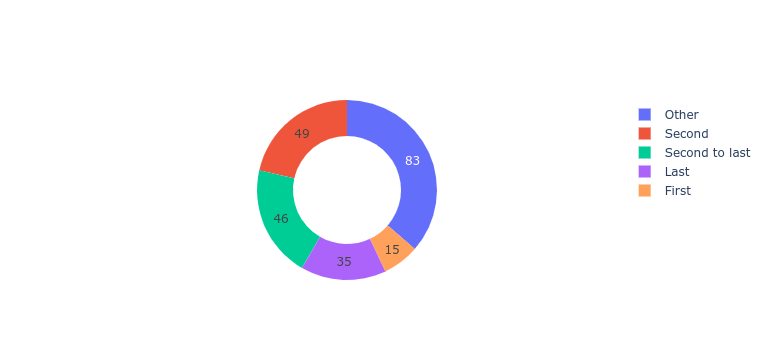

In [254]:
Position = temp['Position'].value_counts().reset_index()

labels = Position['index']
values = Position['Position']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

fig.update_traces(textinfo='value')

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.show()


In [210]:
text = dat['Document Title'].to_list()
titles = " ".join(text)
titles = titles.replace("Using", "")
titles = titles.replace("using", "")
titles = titles.replace("Based", "")
titles = titles.replace("based", "")
titles = titles.replace("BASED", "")

titleFile = open("titleFile.txt", "w")
titleFile.write(titles)
titleFile.close()


import stylecloud as sc
sc.gen_stylecloud(file_path = 'titleFile.txt', 
                  icon_name = 'fas fa-brain',
                  stopwords = True)

os.rename('stylecloud.png', 'titles.png')

Here's a wordcloud of words in the titles (excluding common use words, in the shape of an axial brain slice).

<img src= 'titles.png' alt="Wordcloud" style="height: 300px; width:300px;"/>

Here's the total citation counts of manuscripts plotted by year of publication. Hover over a point to see publication details.

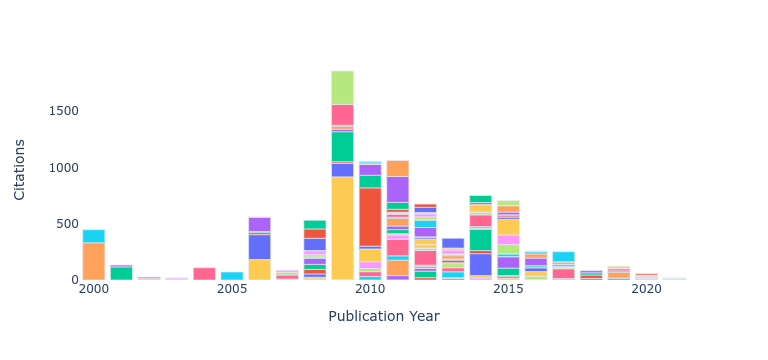

In [85]:
temp = dat
temp = temp.rename(columns = {'total' : 'Citations'})
fig = px.bar(temp, 
             x = 'Publication Year', 
             y = 'Citations', 
             color = 'Document Title',
             hover_data = ['Publication Year', 'Citations', 'Document Title', 'Journal Title'])

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.update_layout(showlegend=False)

## Static image
#Image(fig.to_image(format="png", width=400, height=250, scale=2))
fig.show()

# Part II 
## Teaching
### Advisees
To the nearest year from matriculation year. Includes advisees and co-advisees (hover over to see details).

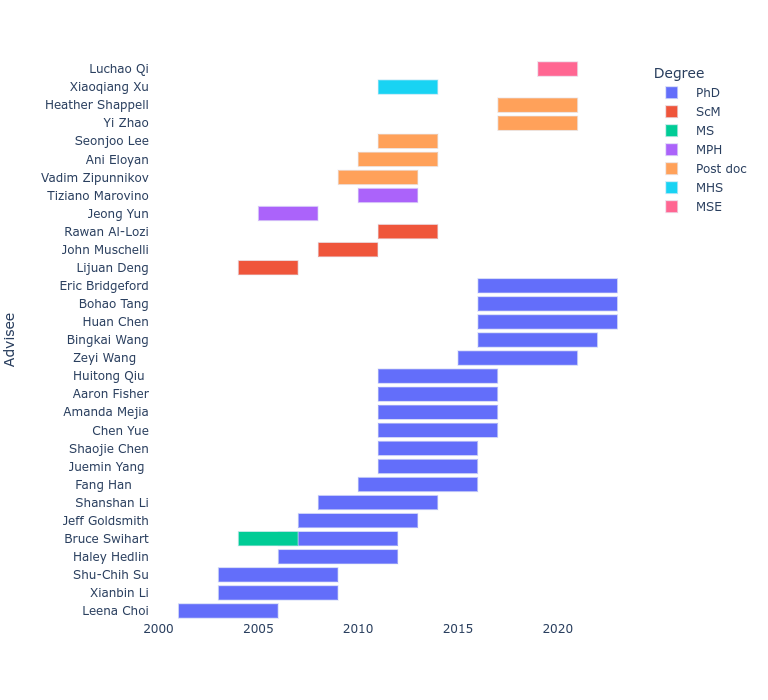

In [435]:
advisees = pd.read_csv("Advisees.txt", sep = "|")

advisees['Start'] = pd.to_datetime("01/01/"+advisees['Start'].astype(str))
advisees['End'] = pd.to_datetime("12/31/"+advisees['End'].astype(str))
advisees = advisees.sort_values(by = ['Start', 'End'])
    
    
fig = px.timeline(advisees, 
                  x_start="Start", 
                  x_end="End", 
                  y='Advisee', 
                  color="Degree",
                  height=700,
                  hover_data = ['Title', 'Notes'])

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.show()

### Student exam participation
Excludes alternate.

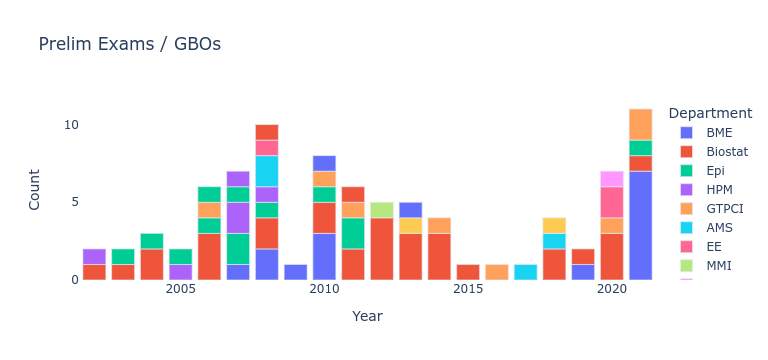

In [ ]:
exams = pd.read_csv("exams.csv")
exams['Exam'] = exams['Exam'].str.strip()
exams['Department'] = exams['Department'].str.strip()
exams = exams[ ['Year', 'Department', 'Exam'] ].value_counts().reset_index()
exams = exams.rename(columns = {0 : 'Count'})

fig = px.bar(exams[ exams['Exam'] == "prelim"], x = "Year", y = "Count", color = "Department", title = "Prelim Exams / GBOs")

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})


## Static image
#Image(fig.to_image(format="png", width=600, height=300, scale=2))
## Interactive
fig.show()

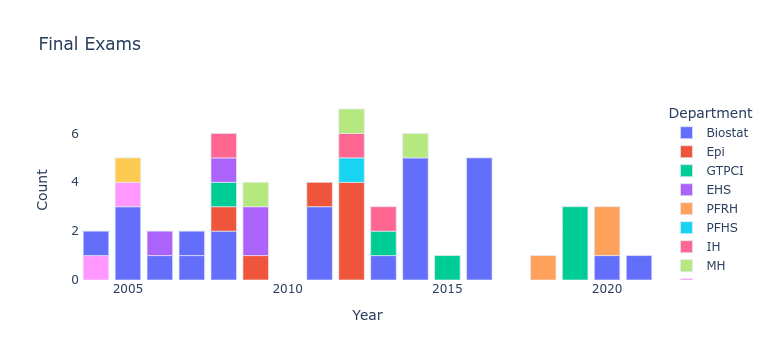

In [91]:
fig = px.bar(exams[ exams['Exam'] == "final"], x = "Year", y = "Count", color = "Department", title = "Final Exams")

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

## Static
#Image(fig.to_image(format="png", width=600, height=300, scale=2))
## Interactive
fig.show()

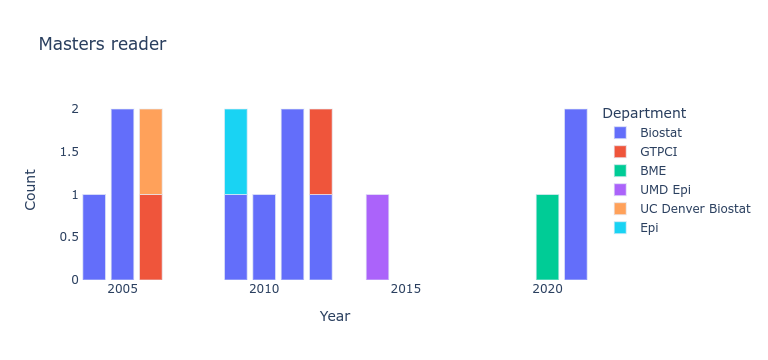

In [92]:
fig = px.bar(exams[ exams['Exam'] == "masters"], 
             x = "Year", y = "Count", color = "Department", title = "Masters reader")

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

## Static
#Image(fig.to_image(format="png", width=600, height=300, scale=2))
## Interactive
fig.show()

### Classroom Instruction
To the nearest year. Data Science and EDS specializations were with Roger Peng and Jeff Leek. Hover over to see instructor role and other info.

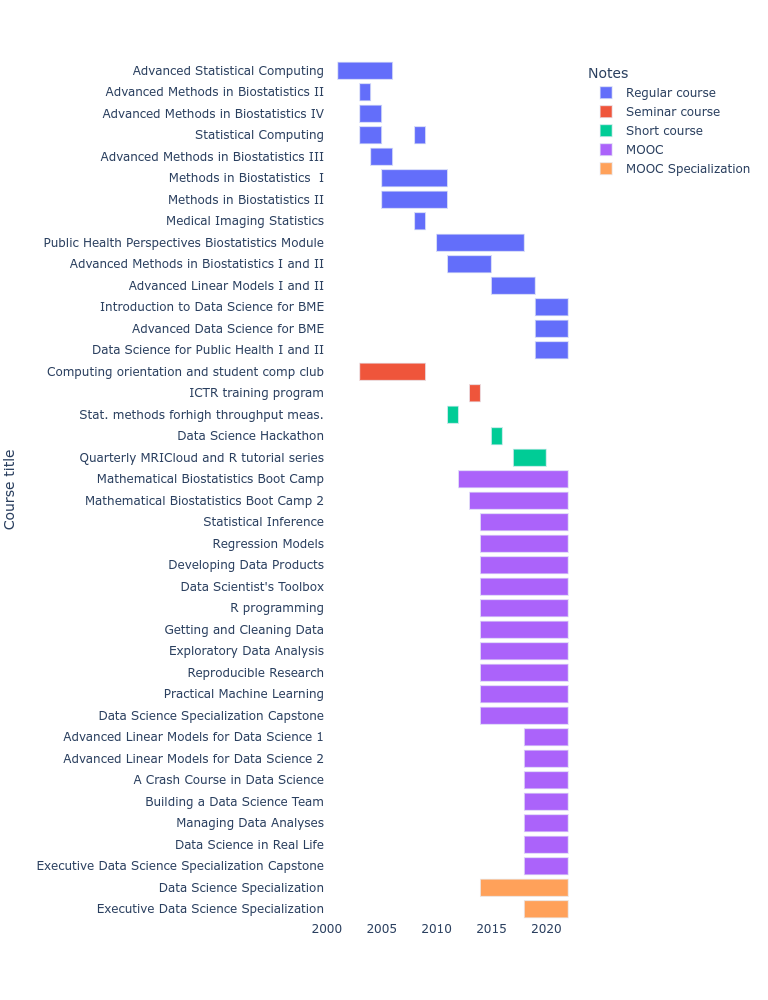

In [148]:
classes = pd.read_csv("classes.txt", delimiter="|").drop(['Unnamed: 0', ' '], axis = 1)
classes['Start'] = pd.to_datetime("01/01/"+classes['Start'].astype(str))
classes['End'] = pd.to_datetime("12/31/"+classes['End'].astype(str))
classes = classes.sort_values(by = ['Start', 'End'])
   
    
fig = px.timeline(classes, x_start="Start", x_end="End", y="Course title", color="Notes",
                 hover_data = ['Course title', 'Place', 'Notes'],
                  height=1000)
fig.update_yaxes(autorange="reversed")

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.show()



##### E-books
E-books are free and open access, excepting *Methods in Biostatistics with R*. For all books, student get all subsequent version updates.

+ *Statistical Inference*, Leanpub 
+ *Regression Models*, Leanpub
+ *Developing Data Products*, Leanpub 
+ *Advanced Linear Models for Data Science*, Leabpub,
+ *Methods in Biostatistics with R*, Leanpub, with John Muschelli, Ciprian Crainiceanu
+ *Executive Data Science*, Leanpub, with Roger Peng, Jeff Leek

##### Other
+ PI (roll of executive producer, non-instructor) for the BD2K R25 Genomic Data Science Specialization, fMRI 1 and 2 (Lindquist / Wager), Neurohacking in R (Craininceanu, Sweeney, Muschelli), Neuroscience for Neuroimaging (Baker)
+ swirl: Mentored project by Nick Carchedi intiated during his internship
+ Course notes for Biostatistics 140.651-2 listed on the Johns Hopkins Open Courseware project 
+ YouTube channel (all educational content) - 14k subscribers, over 400 videos, 6.4k views in past 28 days, ~300 hours of total watch time in the last 28 days

### Research grants
Hover data includes, granting organization, mechanism and title. 

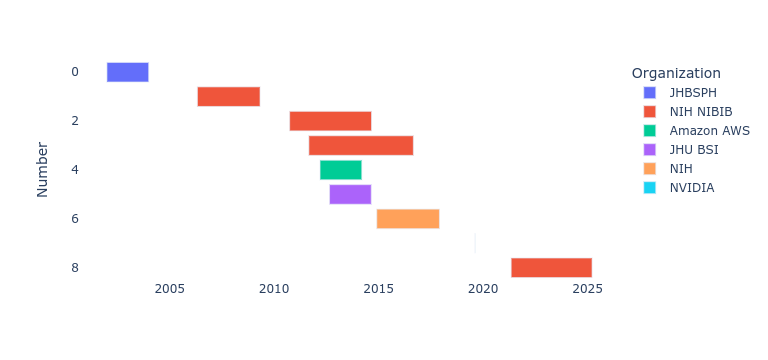

In [350]:
pigrants = pd.read_csv("grants.txt", delimiter="|")
pigrants = pigrants.drop([' '], axis = 1)
pigrants = pigrants.assign(Number = np.arange(pigrants.shape[0]))
pigrants['Start'] = pd.to_datetime(pigrants['Start'])
pigrants['Finish'] = pd.to_datetime(pigrants['Finish'])

fig = px.timeline(pigrants, x_start="Start", x_end="Finish", y="Number", color="Organization",
                 hover_data = ['Role', 'Start', 'Finish', 'Organization', 'Mechanism', 'Title'])
fig.update_yaxes(autorange="reversed")

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.show()


### Co-investigator and subcontract awards
This is surprisingly hard and likely incomplete. Here's the best I could do for title and mechanism.

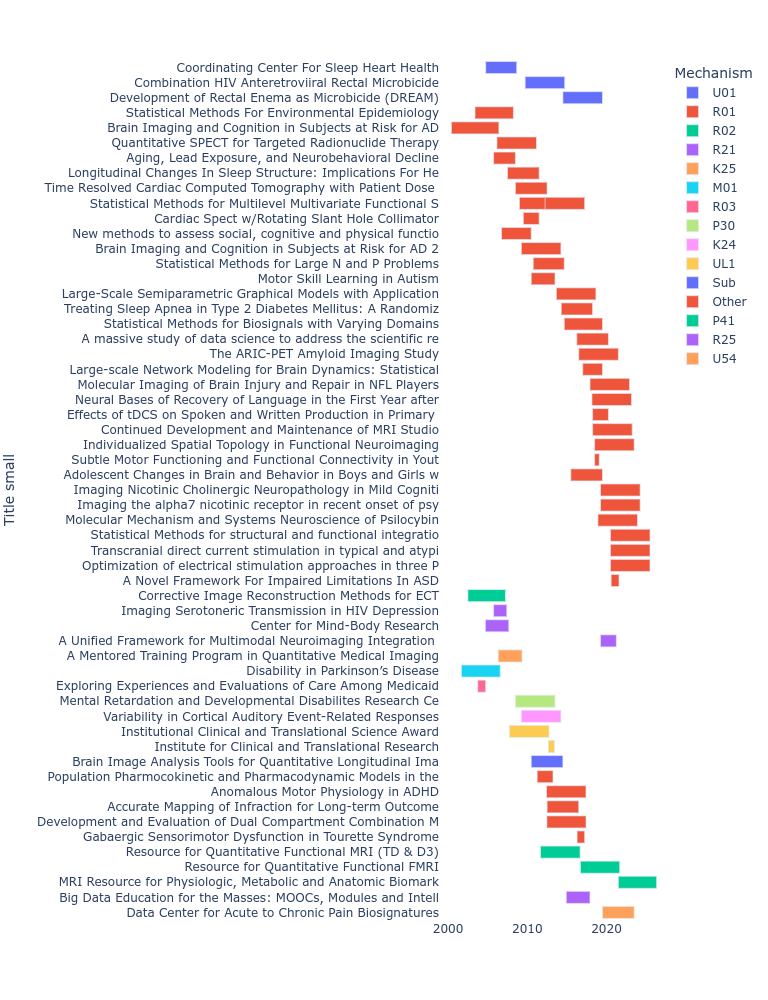

In [431]:
grants = pd.read_csv("grantsFull.csv")
grants.head()
grants = grants.assign(Number = np.arange(grants.shape[0]))
grants['Start'] = pd.to_datetime(grants['Start'])
grants['End'] = pd.to_datetime(grants['End'])
grants.loc[grants['Mechanism'].isna(), 'Mechanism'] = 'Other'
grants.loc[grants['PI'].isna(), 'PI'] = 'Other'
grants['Title small'] = [i[0 : 70] for i in grants['Title']]
grants.loc[grants['YearlyDC'].isna(), 'YearlyDC'] = "No info"

fig = px.timeline(grants, x_start="Start", x_end="End", y="Title small", color = "Mechanism",
                  height=1000)
fig.update_yaxes(autorange="reversed")

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})
fig.show()


Here's my most frequent grant PIs.

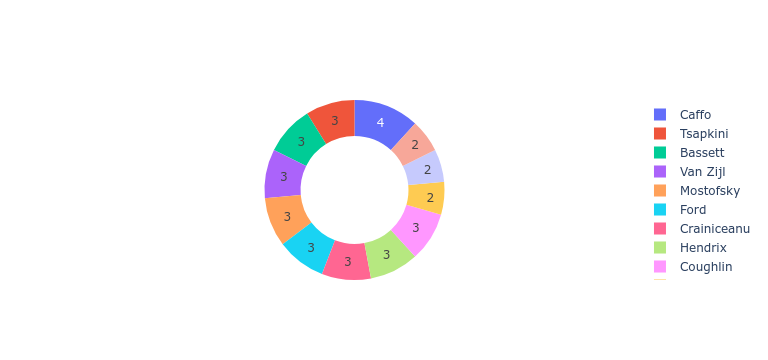

In [432]:
PI = grants['PI'].value_counts().reset_index()
PI.loc[PI['PI'] == 1, 'PI'] = 'Other'


labels = PI['index']
values = PI['PI']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

fig.update_traces(textinfo='value')

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.show()

Here's a breakdown of grant mechanisms.

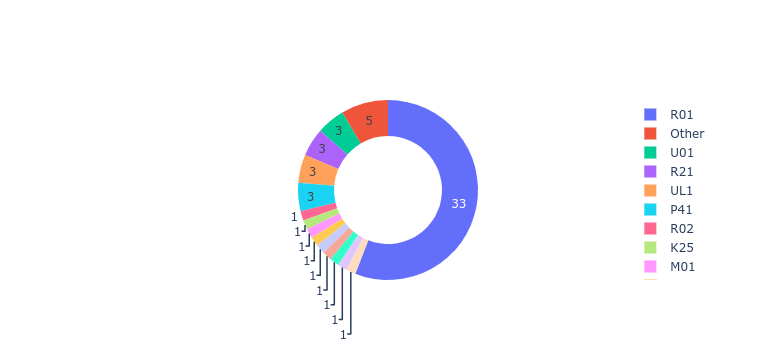

In [433]:
mechanism = grants['Mechanism'].value_counts().reset_index()


labels = mechanism['index']
values = mechanism['Mechanism']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

fig.update_traces(textinfo='value')

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.show()

Here's grants by the log base 10 of the yearly direct costs and start time.

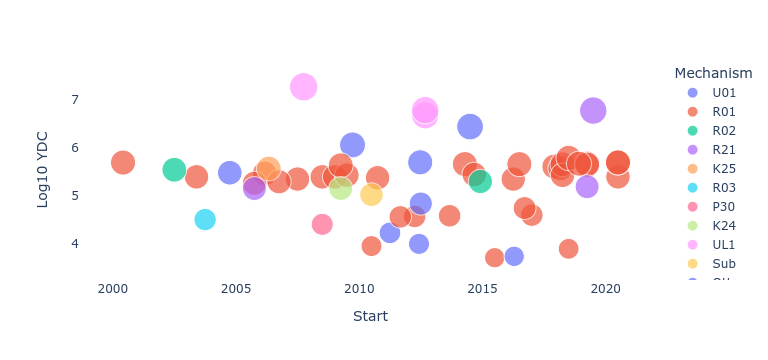

In [434]:
YDC = []
for x in grants['YearlyDC']:
    if x != "No info":
        x = np.log10(float(x.replace("$", "").replace(",", "")))
        YDC.append(x)
    else :
        YDC.append(-1)
grants['Log10 YDC'] = YDC

fig = px.scatter(grants[(grants['Log10 YDC'] > 0)],
                 y = 'Log10 YDC',
                 x = 'Start',
                 color = 'Mechanism',
                 size = 'Log10 YDC')
fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.show()

### Academic service 
Here's my major service roles by year rounded to the nearest year by the major organizational group that it represents. Also, I serve on ad hoc tenure and promotion committees whenever asked (not that often, maybe once every other year or so).

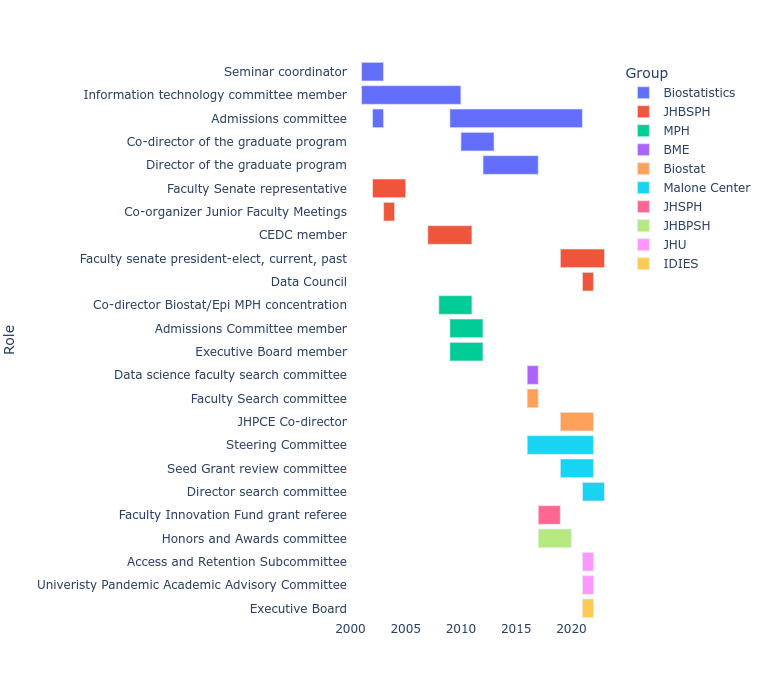

In [163]:
service = pd.read_csv("service.txt", delimiter="|").drop(['Unnamed: 0', 'Unnamed: 5'], axis = 1)
service['Start'] = pd.to_datetime("01/01/"+service['Start'].astype(str))
service['End'] = pd.to_datetime("12/31/"+service['End'].astype(str))
service = service.sort_values(by = ['Start', 'End'])

    
fig = px.timeline(service, x_start="Start", x_end="End", y="Role", color="Group",
                 hover_data = ['Role', 'Group'],
                 height = 600)
fig.update_yaxes(autorange="reversed")

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.show()

### Seminars
Here's a plot of the invited seminars I've logged. The list with presentation files can be found 
[here](https://docs.google.com/spreadsheets/d/1mRC6xxZmNj3DnwwvCh_8GpErwhvJNq9gkRB3mQz1JIg/edit?usp=sharing).

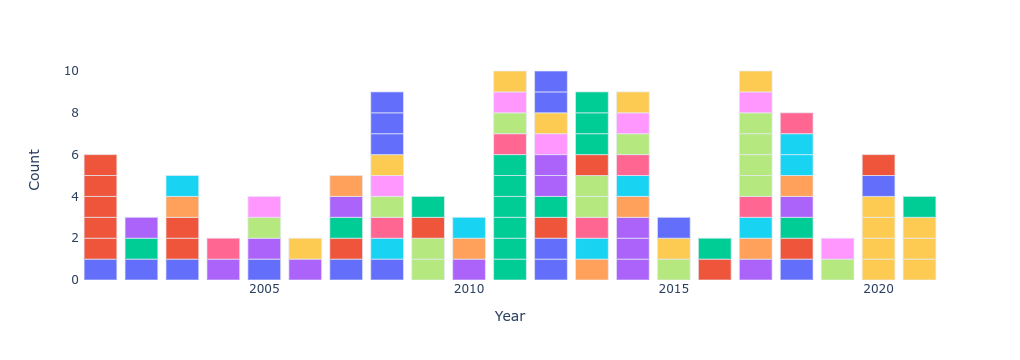

In [59]:
seminars = pd.read_csv("https://docs.google.com/spreadsheets/d/1mRC6xxZmNj3DnwwvCh_8GpErwhvJNq9gkRB3mQz1JIg/export?format=csv&gid=0")
seminars = seminars.assign(Count = 1)
#seminarYear = seminars['Year'].value_counts().reset_index()
#seminarYear = seminarYear.rename(columns = {"index" : "Year", "Year" : "Count"}).sort_values("Year", ascending =False)
#fig = px.bar(seminarYear, x = "Year", y = "Count")
fig = px.bar(seminars, x = "Year", y = "Count", color = "Talk",
             hover_data = ['Year', 'Talk', 'Where'])
fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.update_layout(showlegend=False)

## Static
#Image(fig.to_image(format="png", width=400, height=200, scale=2))
## Interactive
fig.show()

Here's wordclouds of seminar titles and seminar places.

In [211]:
text = seminars['Talk'].to_list()
titles = " ".join(text)
#titles = titles.replace("Using", "")

titleFile = open("seminarTitleFile.txt", "w")
titleFile.write(titles)
titleFile.close()


import stylecloud as sc
sc.gen_stylecloud(file_path = 'seminarTitleFile.txt', 
                  icon_name = 'fas fa-brain',
                  stopwords = True)

os.rename('stylecloud.png', 'seminarTitles.png')

In [232]:
text = seminars['Where']
text = text[~text.isna()].to_list()
titles = " ".join(text)
titles = titles.replace("Talk", "")
titles = titles.replace("Given", "")
titles = titles.replace("talk", "")
titles = titles.replace("given", "")
titles = titles.replace("Research", "")
titles = titles.replace("research", "")

titleFile = open("seminarWhereFile.txt", "w")
titleFile.write(titles)
titleFile.close()


import stylecloud as sc
sc.gen_stylecloud(file_path = 'seminarWhereFile.txt', 
                  icon_name = 'fas fa-brain',
                  stopwords = True)

os.rename('stylecloud.png', 'seminarWhere.png')

<img src="seminarTitles.png" alt="Wordcloud" style="height: 300px; width:300px;"/> <img src="seminarWhere.png" alt="Wordcloud" style="height: 300px; width:300px;"/>

## CV todo 
+ Fix typos and make abbreviations consistent
+ Improve on the style
+ Automate to PDF output
+ Convert to DASH
+ Improve hover data for exams
+ Clean up the code (good grief it's ugly)
+ Common color pallette and increase colors since wrapping is an issue